# Project 5 - Survival on the Titanic

## Load and Process Data:

In [125]:
 train.data <- read.csv("TitanicTrain.csv")

In [62]:
install.packages("caTools")    # For Linear regression 
library(caTools)

install.packages('car')
library(car)


The downloaded binary packages are in
	/var/folders/6s/sfty3wm96t51l6m9spnzj7qm0000gq/T//RtmpmuaWlH/downloaded_packages

The downloaded binary packages are in
	/var/folders/6s/sfty3wm96t51l6m9spnzj7qm0000gq/T//RtmpmuaWlH/downloaded_packages


Loading required package: carData



In [10]:
#train.data

In [126]:
train.df = subset(train.data, select = -c(PassengerId, Name, Ticket, Cabin))

In [173]:
#train.df

We dropped the columns above because for multiple reasons. Most were dropped because we thought they would have little to no effect on the survival results unless further processed, or because there were simply too many missing values, or because the data was encompassed in another variable.

In [128]:
train.df$sex <- as.numeric(as.factor(train.data$Sex))

In [129]:
train.df$embarked <- as.numeric(as.factor(train.data$Embarked))

In [130]:
train.df = subset(train.df, select = -c(Sex, Embarked))

In [134]:
sum(is.na(train.df$Age))

[1] 0

In [132]:
mean(train.df$Age, na.rm=TRUE)

[1] 29.69912

In [133]:
train.df$Age[is.na(train.df$Age)] <- mean(train.df$Age, na.rm = TRUE)

## Part 1:

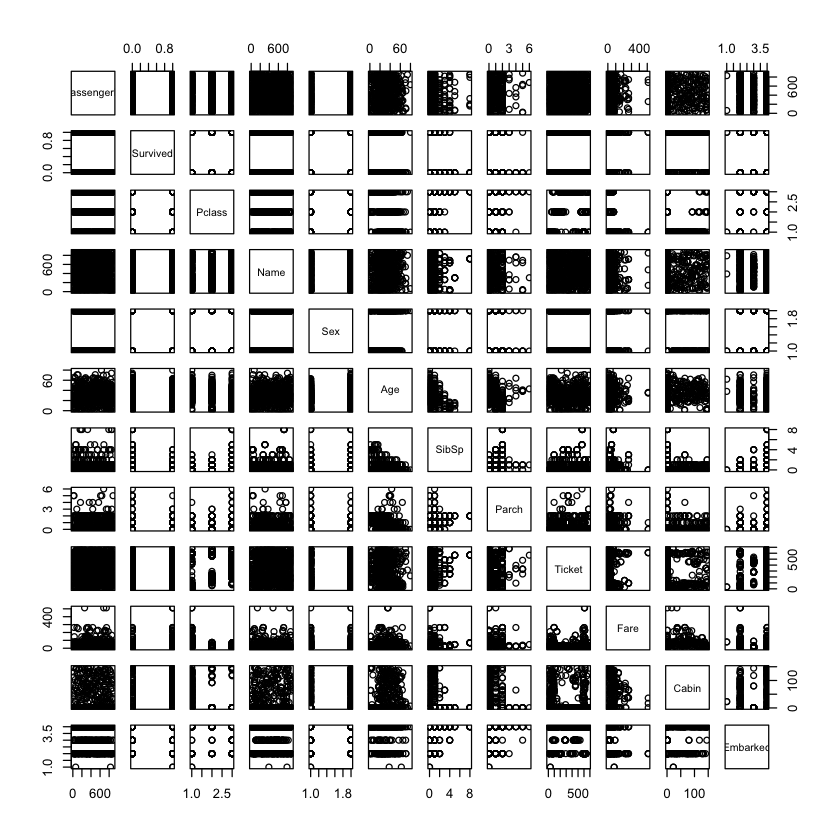

In [4]:
plot(train.data)

In [25]:
cor(train.df)

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,embarked
Survived,1.00000000,-0.33848104,-0.06980852,-0.03532250,0.08162941,0.25730652,-0.54335138,-0.17650923
Pclass,-0.33848104,1.00000000,-0.33133877,0.08308136,0.01844267,-0.54949962,0.13190049,0.17351114
Age,-0.06980852,-0.33133877,1.00000000,-0.23262459,-0.17919092,0.09156609,0.08415344,-0.03960956
SibSp,-0.03532250,0.08308136,-0.23262459,1.00000000,0.41483770,0.15965104,-0.11463081,0.07147963
Parch,0.08162941,0.01844267,-0.17919092,0.41483770,1.00000000,0.21622494,-0.24548896,0.04335130
Fare,0.25730652,-0.54949962,0.09156609,0.15965104,0.21622494,1.00000000,-0.18233283,-0.23036457
sex,-0.54335138,0.13190049,0.08415344,-0.11463081,-0.24548896,-0.18233283,1.00000000,0.11849166
embarked,-0.17650923,0.17351114,-0.03960956,0.07147963,0.04335130,-0.23036457,0.11849166,1.00000000


In [27]:
#attach(train.df)

In [29]:
model.1 <- lm(Survived ~ Pclass + Age + SibSp + 
              Parch + Fare + sex + embarked)
summary(model.1)


Call:
lm(formula = Survived ~ Pclass + Age + SibSp + Parch + Fare + 
    sex + embarked)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06403 -0.20205 -0.08975  0.23134  0.99623 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.9262634  0.0957007  20.128  < 2e-16 ***
Pclass      -0.1688926  0.0196477  -8.596  < 2e-16 ***
Age         -0.0058303  0.0010726  -5.436 7.06e-08 ***
SibSp       -0.0411367  0.0130455  -3.153  0.00167 ** 
Parch       -0.0169146  0.0181308  -0.933  0.35112    
Fare         0.0002821  0.0003283   0.859  0.39035    
sex         -0.5062482  0.0280179 -18.069  < 2e-16 ***
embarked    -0.0358057  0.0165438  -2.164  0.03071 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.379 on 883 degrees of freedom
Multiple R-squared:  0.3981,	Adjusted R-squared:  0.3934 
F-statistic: 83.44 on 7 and 883 DF,  p-value: < 2.2e-16


We are dropping Parch and Fare here as they don't seem to be statistically significnat at the 0.05 threshold. 

In [30]:
lm.model.2 <- lm(Survived ~ Pclass + Age + 
                 SibSp + sex + embarked)
summary(lm.model.2)


Call:
lm(formula = Survived ~ Pclass + Age + SibSp + sex + embarked)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0634 -0.2120 -0.0839  0.2309  1.0005 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.954493   0.082188  23.781  < 2e-16 ***
Pclass      -0.177730   0.016531 -10.751  < 2e-16 ***
Age         -0.005792   0.001068  -5.425 7.49e-08 ***
SibSp       -0.043226   0.011935  -3.622 0.000309 ***
sex         -0.502559   0.027341 -18.381  < 2e-16 ***
embarked    -0.039009   0.016237  -2.403 0.016487 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3789 on 885 degrees of freedom
Multiple R-squared:  0.3972,	Adjusted R-squared:  0.3938 
F-statistic: 116.6 on 5 and 885 DF,  p-value: < 2.2e-16


In [54]:
predicted = predict(lm.model.2, type="response")
lm.pred = ifelse(predicted > 0.5, 1, 0)
table(lm.pred, train.df$Survived)
mean(lm.pred == train.df$Survived)

       
lm.pred   0   1
      0 470 101
      1  79 241

[1] 0.7979798

In [66]:
vif(lm.model.2)

Pclass      Age    SibSp      sex embarked 
1.184517 1.195112 1.074007 1.059024 1.046841

This model clearly doesn't do very well with preducting the results even though the predictors seem to be significant. This is probably due to the fact that the model is linear for a binomial result. The R-squared value is also quite low for this model. The VIF for the model is good and the variables don't seem to be correlated with each other. 

### Logistic Regression

In [38]:
model.3 <- glm(Survived ~ Pclass + Age + 
        SibSp + Parch + Fare + sex + embarked, family=binomial)
summary(model.3)


Call:
glm(formula = Survived ~ Pclass + Age + SibSp + Parch + Fare + 
    sex + embarked, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6357  -0.5888  -0.4177   0.6179   2.4339  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  8.491773   0.765585  11.092  < 2e-16 ***
Pclass      -1.083826   0.139370  -7.777 7.45e-15 ***
Age         -0.039482   0.007828  -5.044 4.57e-07 ***
SibSp       -0.327688   0.109699  -2.987  0.00282 ** 
Parch       -0.100069   0.118148  -0.847  0.39701    
Fare         0.001923   0.002385   0.806  0.42013    
sex         -2.737399   0.199240 -13.739  < 2e-16 ***
embarked    -0.228290   0.114545  -1.993  0.04626 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  784.77  on 883  degrees of freedom
AIC: 800.77

Number of Fisher Scoring i

We are dropping Parch and Far again because they are not statistically significant at the 0.05 threshold.

In [74]:
model.4 <- glm(Survived ~ Pclass + Age + SibSp + sex + 
        embarked, data=train.df, family=binomial)
summary(model.4)


Call:
glm(formula = Survived ~ Pclass + Age + SibSp + sex + embarked, 
    family = binomial, data = train.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6226  -0.5981  -0.4110   0.6243   2.4470  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  8.666685   0.694864  12.472  < 2e-16 ***
Pclass      -1.140151   0.120693  -9.447  < 2e-16 ***
Age         -0.039425   0.007792  -5.060  4.2e-07 ***
SibSp       -0.337847   0.103918  -3.251  0.00115 ** 
sex         -2.711244   0.194347 -13.951  < 2e-16 ***
embarked    -0.248055   0.111949  -2.216  0.02671 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degrees of freedom
Residual deviance:  785.94  on 885  degrees of freedom
AIC: 797.94

Number of Fisher Scoring iterations: 5


In [75]:
predicted = predict(model.4, type="response")
lm.pred = ifelse(predicted > 0.5, 1, 0)
table(lm.pred, train.df$Survived)
mean(lm.pred == train.df$Survived)

       
lm.pred   0   1
      0 470  99
      1  79 243

[1] 0.8002245

In [41]:
G <- 1186.66 - 785.94
df <- 890 - 885
G 

[1] 400.72

In [42]:
pchisq(G, df, lower.tail=F)

[1] 2.075321e-84

So, as we can see above the G test for this model didn't do very well, it wasn't statistically significant, which means we should try another model. The VIF for this model as seen below is good, meaning our predictors aren't correlated with one another. 

In [65]:
vif(model.4)

Pclass      Age    SibSp      sex embarked 
1.303538 1.278056 1.129613 1.137097 1.016944

### Decision Tree Model

In [45]:
#install.packages("rpart") 
library(rpart)
tree_one <- rpart(formula = Survived ~ Pclass + Age + SibSp + 
                  Parch + Fare + sex + embarked,  
                  data = train.df, method = "class", cp=0.015)

In [50]:
#install.packages("rpart.plot") 
library(rattle) 
library(rpart.plot) 

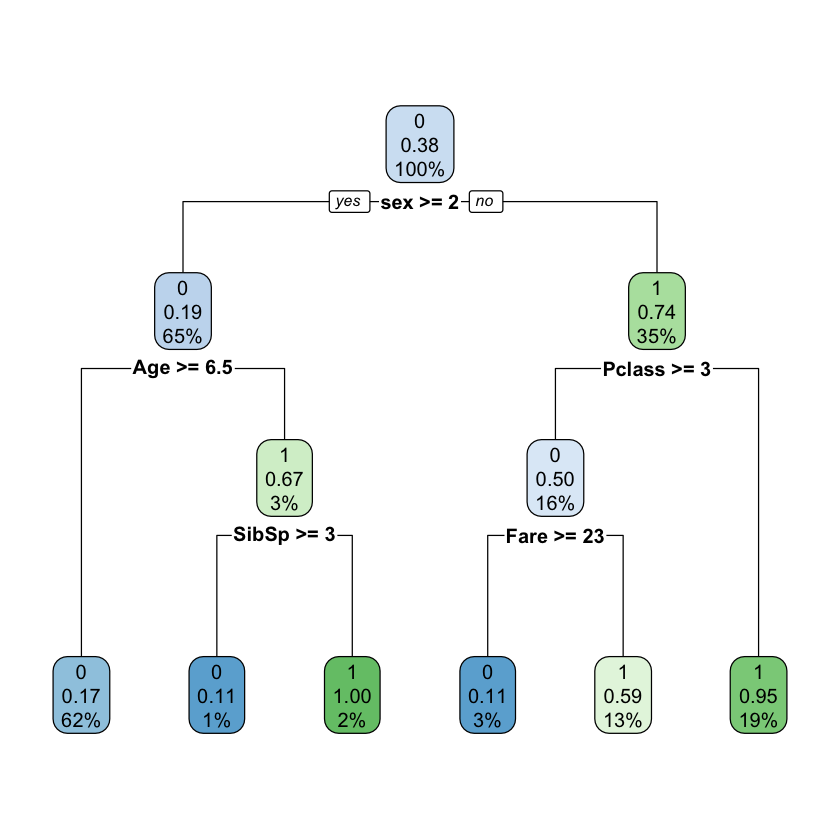

In [53]:
par(mfrow = c(1, 1)) # one plot per col 
rpart.plot(tree_one) 
#fancyRpartPlot(tree_one) 
#fancyRpartPlot(tree_one, tweak=1.5) #tweak displays larger font by that % 

In [58]:
predicted <- predict(tree_one, train.df, type = "class") 
addmargins(table(predicted, train.df$Survived)) 
#table(train.df$Survived)

,0,1,Sum
0,492,97,589
1,57,245,302
Sum,549,342,891


In [59]:
round(mean(predicted == train.df$Survived),3) 

[1] 0.827

This accuracy is higher than the previous two models, but this model is prone to overfitting. Therefore, we will use the logistic regression model for further analysis. 

## Part 2: Residual Analysis

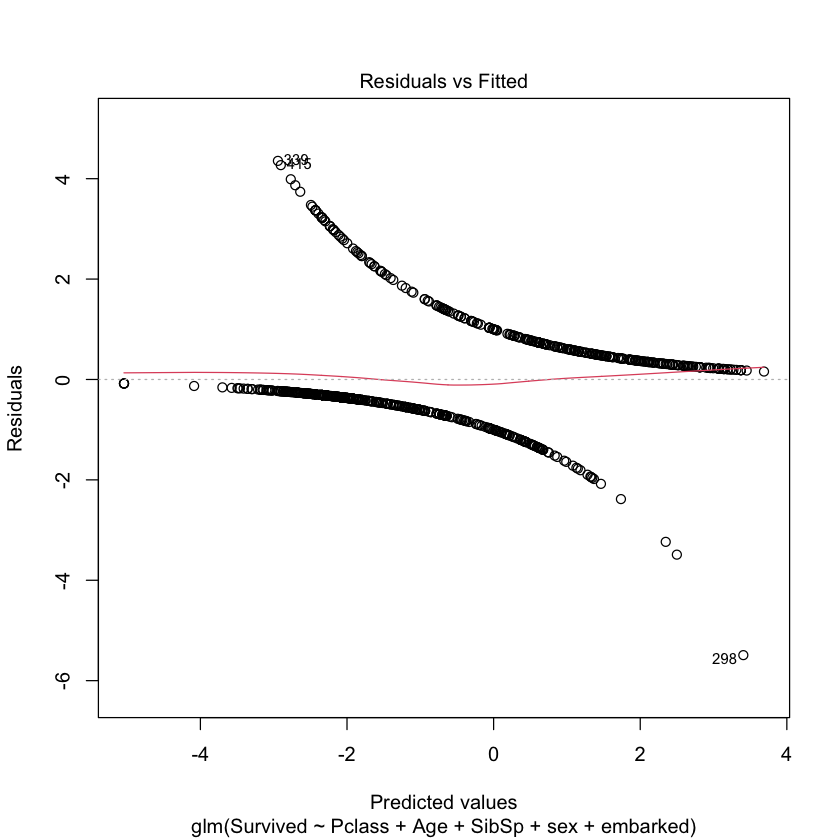

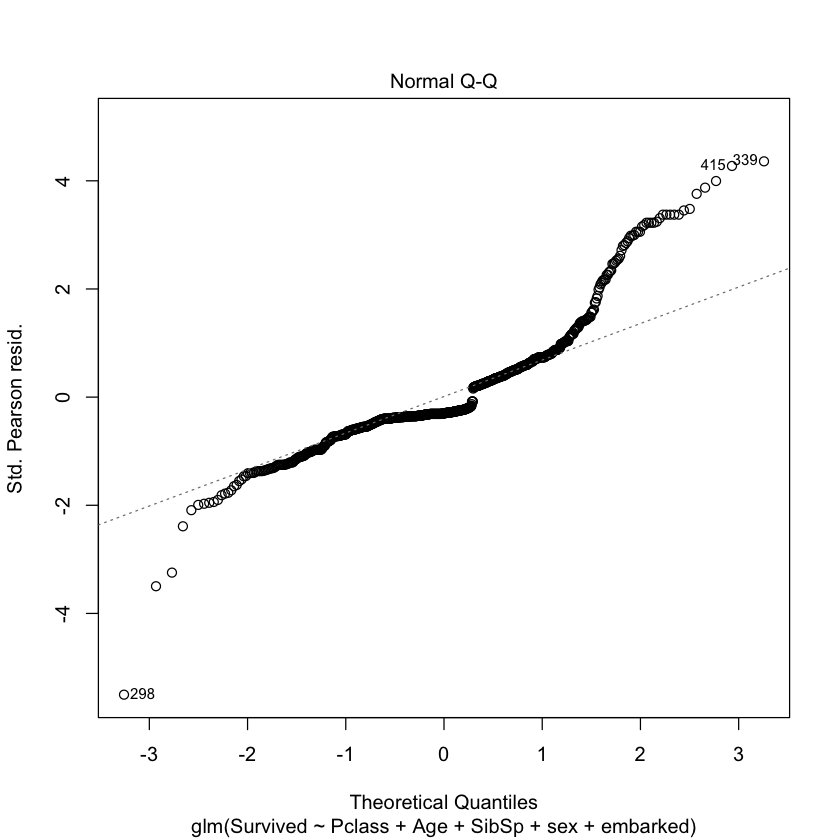

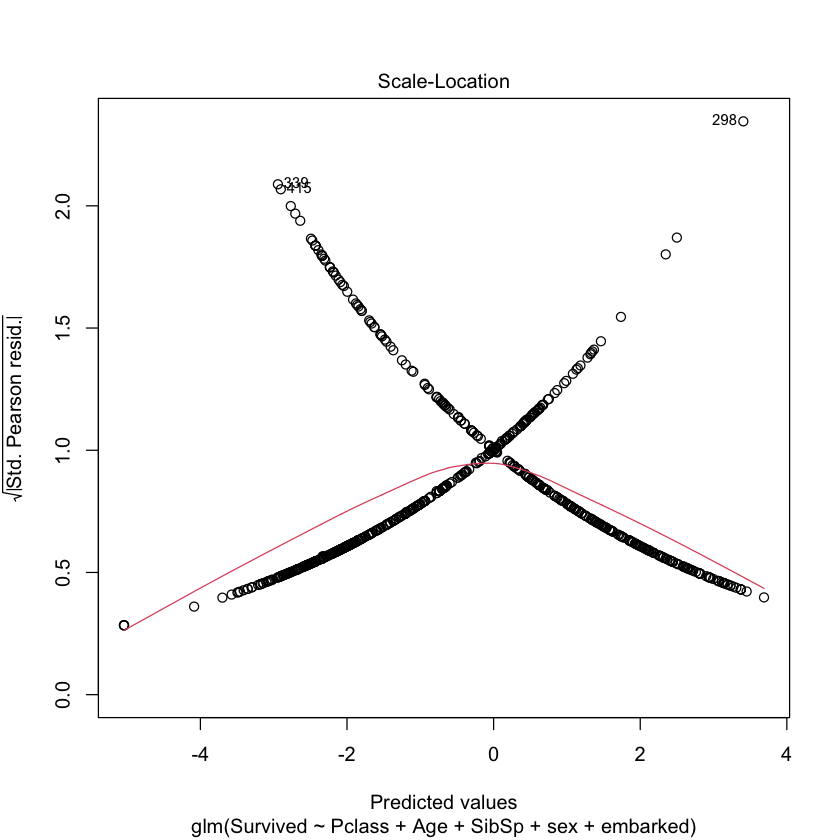

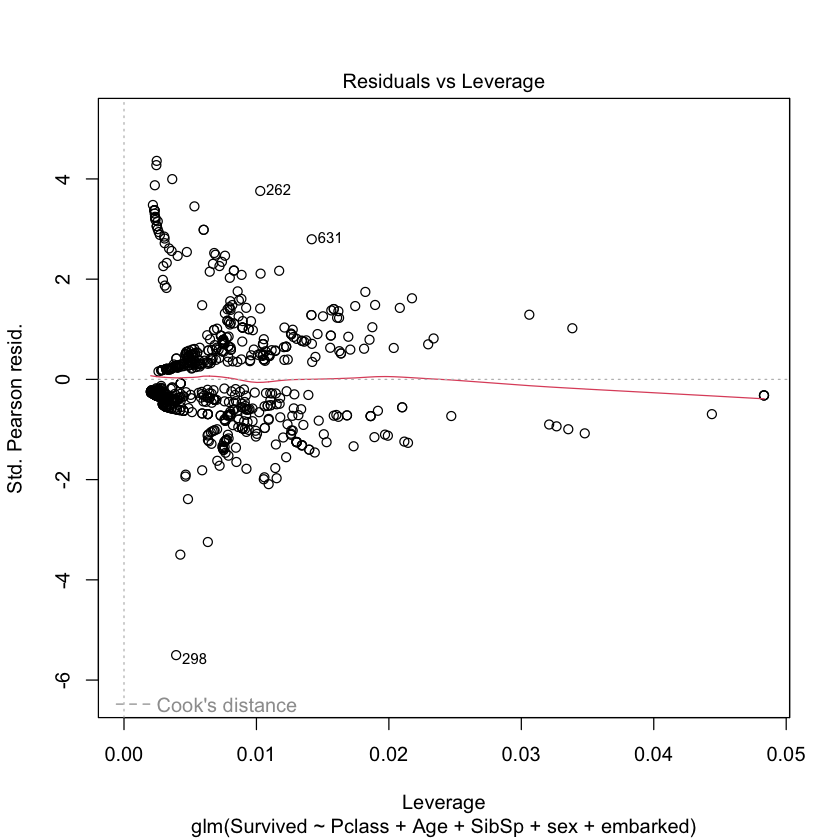

In [69]:
plot(model.4)

In [135]:
train.df$residuals <- model.4$residuals
train.df$studentized <- rstudent(model.4)
train.df$leverages <- hatvalues(model.4)
train.df$cooks <- cooks.distance(model.4)

In [137]:
#train.df

Upon analysis of the graph of residuals vs. predicted values above, we can see that the overall red trend line of the data is quite close to zero at al times, meaning that the model does quite well. There are a few outliers...data points 339, 445, and 298 have quite high residuals as compared to the rest of the model. Although, the model does not seem to have homoscedasticity it's not important as we do not make that assumption in a logistic model. Since we make no assumptions of normality in a logistic regression, the normal Q-Q plot not being completely linear is not as much of a concern. The plot of Residuals vs Leverage, shows us that none of our values affect the regression too much and none of our values are outside the Cook's Distance. 

##  Part 3 - Cross-validation: 

In [72]:
TitanicTest <- read.csv("testWSurvived.csv")

In [90]:
#TitanicTest

In [80]:
TitanicTest$Age[is.na(TitanicTest$Age)] <- mean(TitanicTest$Age, na.rm = TRUE)

In [92]:
test.df = subset(TitanicTest, select = -c(PassengerId, Name, Ticket, Cabin))

In [93]:
test.df$sex <- as.numeric(as.factor(TitanicTest$Sex))

In [94]:
test.df$embarked <- as.numeric(as.factor(TitanicTest$Embarked))

In [95]:
test.df = subset(test.df, select = -c(Sex, Embarked))

In [155]:
#test.df

In [97]:
test.df <- test.df[!(is.na(test.df$Survived)), ]

In [111]:
length(test.df$Age)

[1] 398

In [174]:
#attach(test.df)

In [176]:
b0 <- coef(model.4)[1] 
b1 <- coef(model.4)[2] 
b2 <- coef(model.4)[3] 
b3 <- coef(model.4)[4] 
b4 <- coef(model.4)[5] 
b5 <- coef(model.4)[6]

predQ = exp(b0+b1*Pclass+b2*Age+b3*SibSp+b4*sex+b5*embarked)/
(1+exp(b0+b1*Pclass+b2*Age+b3*SibSp+b4*sex+b5*embarked))

In [115]:
length(predQ)

[1] 398

In [116]:
residQ = test.df$Survived - predQ

### a)

In [117]:
mean(residQ)

[1] -0.09087729

In [120]:
sd(residQ)

[1] 0.401251

In [139]:
mean(train.df$residuals)

[1] 0.1194146

In [140]:
sd(train.df$residuals)

[1] 3.188854

The mean is relatively close to what one would expect from the train data. However, the standard deviation is quite different. 

### b)

In [142]:
#sort(residQ)

The residuals calculated above have a high value of 0.95 and a low values of -0.95 which means that there aren't any extreme outliers.

In [144]:
#sort(scale(residQ))

Even with the standardized residuals above, the residuals are around +/- 2.6 which isn't very big.

### c)

In [147]:
(cor(test.df$Survived, predQ))^2

[1] 0.3043928

In [150]:
(cor(train.df$Survived, predicted))^2

[1] 0.4093721

In [151]:
(cor(train.df$Survived, predicted))^2 - (cor(test.df$Survived, predQ))^2

[1] 0.1049793

Our shrinkage is 0.105. While the correlations aren't the best, the shrinkage looks ok to us as it's pretty small. 

## Part 4 - Final Model:

As the logistic regression was not very well correlated and the decision tree was too overfitting. We thought we might try a random forest for our final model, just to see if we can get higher accuracy or correlation.

In [175]:
#install.packages("randomForest") 
# Load in the package 
#library(randomForest) 
# Set seed for reproducibility 
set.seed(111) 

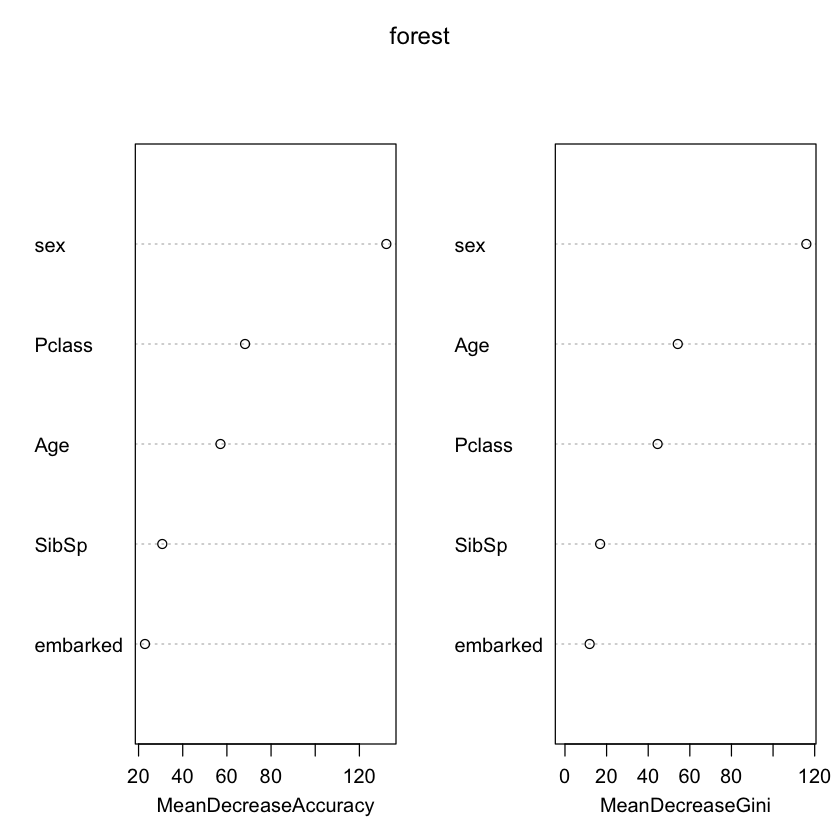

In [158]:
forest <- randomForest(factor(Survived) ~ Pclass + Age + SibSp  
                          + sex + embarked,  
                          data=train.df,  
                          importance = TRUE, ntree = 1000) 
varImpPlot(forest) #standard plot 

In [159]:
my_prediction <- predict(forest, train.df, type = "class") 

In [160]:
my_solution <- data.frame(PassengerId = train.data$PassengerId, 
                          Survived = my_prediction,  
                          row.names = NULL) 
view(my_solution) 
 
addmargins(table(my_prediction, train.df$Survived)) 

,0,1,Sum
0,520,101,621
1,29,241,270
Sum,549,342,891


In [161]:
round(mean(my_prediction == train.df$Survived, na.rm=TRUE),3)

[1] 0.854

In [163]:
## let's check test data as well tho
my_prediction <- predict(forest, test.df, type = "class") 
 
addmargins(table(my_prediction, test.df$Survived))

,0,1,Sum
0,208,44,252
1,50,96,146
Sum,258,140,398


In [165]:
round(mean(my_prediction == test.df$Survived, na.rm=TRUE),3)

[1] 0.764

The random forest did well and seemed to not have too much drop in accuracy between the training and test data. For this reason, we are choosing random forest as our final model. 

### a)

In [166]:
summary(forest)

                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted        891   factor numeric  
err.rate        3000   -none- numeric  
confusion          6   -none- numeric  
votes           1782   matrix numeric  
oob.times        891   -none- numeric  
classes            2   -none- character
importance        20   -none- numeric  
importanceSD      15   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y                891   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

### b)

In [172]:
b5

embarked 
-0.2480553

As we're not sure what the equation for the random forest should look like here is the equation for the logistic regression model which we analyzed for a large portion of this project.   
exp(8.67+(-1.14)*Pclass+(-0.039)*Age+(-0.338)*SibSp+(-2.711)*sex+(-0.248)*embarked)/(1+exp(8.67+(-1.14)*Pclass+(-0.039)*Age+(-0.338)*SibSp+(-2.711)*sex+(-0.248)*embarked))